In [ ]:
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.9.1
!pip install plotly==5.3.1

In [19]:
# Enter url
url="https://docs.google.com/spreadsheets/d/1Le9cyaXi2NOX9eLLGB5COYrSoVLb2SQzZuEEtvaFwbc/edit?resourcekey#gid=1989112409"
# Enter column you wish to read by referring to the spreadsheet
col = "B"

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

data  = requests.get(url).text
print(data)

soup = BeautifulSoup(data, 'html5lib')

Pre_Instructor_Survey_data = pd.DataFrame()

read_html_pandas_data = pd.read_html(url, index_col=0)

Pre_Instructor_Survey_data = read_html_pandas_data[0]

revised = Pre_Instructor_Survey_data
rev1 = revised.dropna(how='all')
rev2 = rev1.dropna(axis='rows', how='all')
rev3 = rev2.dropna(axis='columns', how='all')

rev4 = rev3.fillna(0)

rev5 = rev4[2:]
rev6 = []
for row in rev5[col]:
    if (row == "Yes"):
        rev6.append(1)
    else:
        rev6.append(0)

no = rev6.count(0)
yes = rev6.count(1)

labels = 'Yes', 'No'
sizes = [yes, no]

In [22]:
# Run to see the cleaned data
rev5

,A,B,C,D,E,F,G,H,I,J
2.0,9/6/2023 13:15:29,No,4,No,0,No,No,Yes,Yes,6
3.0,9/6/2023 18:20:42,No,5,No,0,No,Yes,No,No,6
4.0,9/7/2023 10:52:29,Yes,4,No,0,No,Yes,No,No,8
5.0,9/7/2023 11:20:21,Yes,3,No,0,No,Yes,No,No,6
6.0,9/7/2023 11:32:24,Yes,4,No,0,No,Yes,No,Yes,8
7.0,9/7/2023 12:16:31,Yes,5,Yes,-,Yes,Yes,Yes,Yes,10
8.0,9/7/2023 14:26:16,No,3,Yes,0,Yes,Yes,Yes,No,5
9.0,9/8/2023 18:17:34,No,3,No,Nothing,Yes,No,Yes,Yes,7
10.0,9/9/2023 10:27:09,Yes,3,No,0,No,No,Yes,Yes,6
11.0,9/9/2023 12:43:42,No,2,Yes,ujtfuy,No,Yes,No,No,2


([<matplotlib.patches.Wedge at 0x19e2336c640>,
 [Text(-0.24477311341532162, 1.0724206837565984, 'Yes'),
  Text(0.24477321382259096, -1.072420660839281, 'No')],
 [Text(-0.13351260731744813, 0.5849567365945082, '57.1%'),
  Text(0.13351266208504958, -0.5849567240941532, '42.9%')])

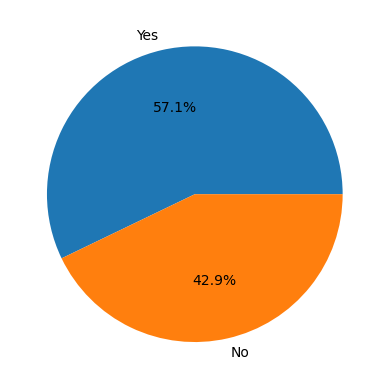

In [21]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')